In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import gridspec

In [2]:
cshapes = pd.read_csv("finalProject/cshapes.csv")

In [3]:
ucdp = pd.read_csv("finalProject\ged191.csv")

In [72]:
sorted_conflict_counts = ucdp.groupby("gwnoa")[["conflict_new_id"]].count().sort_values(by=['conflict_new_id'])

In [82]:
top10 = sorted_conflict_counts.tail(10).sort_values(by=['conflict_new_id'], ascending=False)
bottom10 = sorted_conflict_counts.head(10).sort_values(by=['conflict_new_id'], ascending=False)
top10.rename(columns={"conflict_new_id":"number_of_conflicts"},inplace=True)
bottom10.rename(columns={"conflict_new_id":"number_of_conflicts"},inplace=True)
print(top10)
print(bottom10)

       number_of_conflicts
gwnoa                     
700.0                27464
750.0                10704
645.0                 5630
640.0                 4809
790.0                 4526
780.0                 4185
770.0                 4117
615.0                 3807
520.0                 3797
365.0                 3610
       number_of_conflicts
gwnoa                     
510.0                   10
600.0                    8
580.0                    5
570.0                    4
581.0                    4
420.0                    4
663.0                    4
52.0                     3
95.0                     3
150.0                    1


In [83]:
for key,item in top10.iterrows():
    print(cshapes[cshapes["GWCODE"] == key][["CNTRY_NAME","AREA","GWSYEAR","GWEYEAR"]])

      CNTRY_NAME           AREA  GWSYEAR  GWEYEAR
132  Afghanistan  643557.140913     1946     2016
    CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
222      India  3.166803e+06     1949     2016
224      India  3.060681e+06     1947     1948
   CNTRY_NAME           AREA  GWSYEAR  GWEYEAR
59       Iraq  437462.661411     1946     2016
   CNTRY_NAME           AREA  GWSYEAR  GWEYEAR
95     Turkey  781079.220751     1946     2016
    CNTRY_NAME           AREA  GWSYEAR  GWEYEAR
134      Nepal  147710.194614     1946     2016
    CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
120  Sri Lanka  66468.358961     1948     2016
    CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
135   Pakistan  8.794929e+05     1971     2016
199   Pakistan  1.017998e+06     1949     1971
223   Pakistan  9.361354e+05     1947     1948
   CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
66    Algeria  2.326148e+06     1962     2016
    CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
119    Somalia  640483.58889     1960     2016
    CNT

In [84]:
for key,item in bottom10.iterrows():
    print(cshapes[cshapes["GWCODE"] == key][["CNTRY_NAME","AREA","GWSYEAR","GWEYEAR"]])

    CNTRY_NAME           AREA  GWSYEAR  GWEYEAR
235   Tanzania  947555.660283     1964     1996
237   Tanzania  944923.187336     1961     1964
241   Tanzania  947555.660283     1996     2016
    CNTRY_NAME           AREA  GWSYEAR  GWEYEAR
43     Morocco  401444.801090     1956     1958
214    Morocco  404454.140456     1958     1976
215    Morocco  576351.801160     1976     1979
242    Morocco  674614.242721     1979     2016
     CNTRY_NAME           AREA  GWSYEAR  GWEYEAR
171  Madagascar  596098.591457     1960     2016
    CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
159    Lesotho  30621.428734     1966     2016
    CNTRY_NAME         AREA  GWSYEAR  GWEYEAR
158    Comoros  1726.735969     1975     2016
    CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
53  The Gambia  10787.140456     1965     2016
   CNTRY_NAME          AREA  GWSYEAR  GWEYEAR
61     Jordan  89491.068486     1946     2016
            CNTRY_NAME         AREA  GWSYEAR  GWEYEAR
2  Trinidad and Tobago  5041.728952     1962

In [85]:
top10_full = top10.merge(cshapes, left_on="gwnoa", right_on="GWCODE")
bottom10_full = bottom10.merge(cshapes, left_on="gwnoa", right_on="GWCODE")
top10_full

,number_of_conflicts,CNTRY_NAME,AREA,CAPNAME,CAPLONG,CAPLAT,FEATUREID,COWCODE,COWSYEAR,COWSMONTH,...,GWSYEAR,GWSMONTH,GWSDAY,GWEYEAR,GWEMONTH,GWEDAY,ISONAME,ISO1NUM,ISO1AL2,ISO1AL3
0,27464,Afghanistan,6.435571e+05,Kabul,69.183330,34.516670,134,700,1946,1,...,1946,1,1,2016,6,30,Afghanistan,4,AF,AFG
1,10704,India,3.166803e+06,New Delhi,77.200000,28.600000,227,750,1949,1,...,1949,1,1,2016,6,30,India,356,IN,IND
2,10704,India,3.060681e+06,New Delhi,77.200000,28.600000,229,750,1947,8,...,1947,8,15,1948,12,31,NaN,0,NaN,NaN
3,5630,Iraq,4.374627e+05,Baghdad,44.393890,33.338610,60,645,1946,1,...,1946,1,1,2016,6,30,Iraq,368,IQ,IRQ
4,4809,Turkey,7.810792e+05,Ankara,32.864440,39.927220,97,640,1946,1,...,1946,1,1,2016,6,30,Turkey,792,TR,TUR
5,4526,Nepal,1.477102e+05,Kathmandu,85.316670,27.716670,136,790,1946,1,...,1946,1,1,2016,6,30,Nepal,524,NP,NPL
6,4185,Sri Lanka,6.646836e+04,Colombo,79.847780,6.931944,122,780,1948,2,...,1948,2,4,2016,6,30,Sri Lanka,144,LK,LKA
7,4117,Pakistan,8.794929e+05,Islamabad,73.166660,33.700000,137,770,1971,12,...,1971,12,16,2016,6,30,Pakistan,586,PK,PAK
8,4117,Pakistan,1.017998e+06,Islamabad,73.166660,33.700000,204,770,1949,1,...,1949,1,1,1971,12,15,NaN,0,NaN,NaN
9,4117,Pakistan,9.361354e+05,Islamabad,73.166660,33.700000,228,770,1947,8,...,1947,8,14,1948,12,31,NaN,0,NaN,NaN


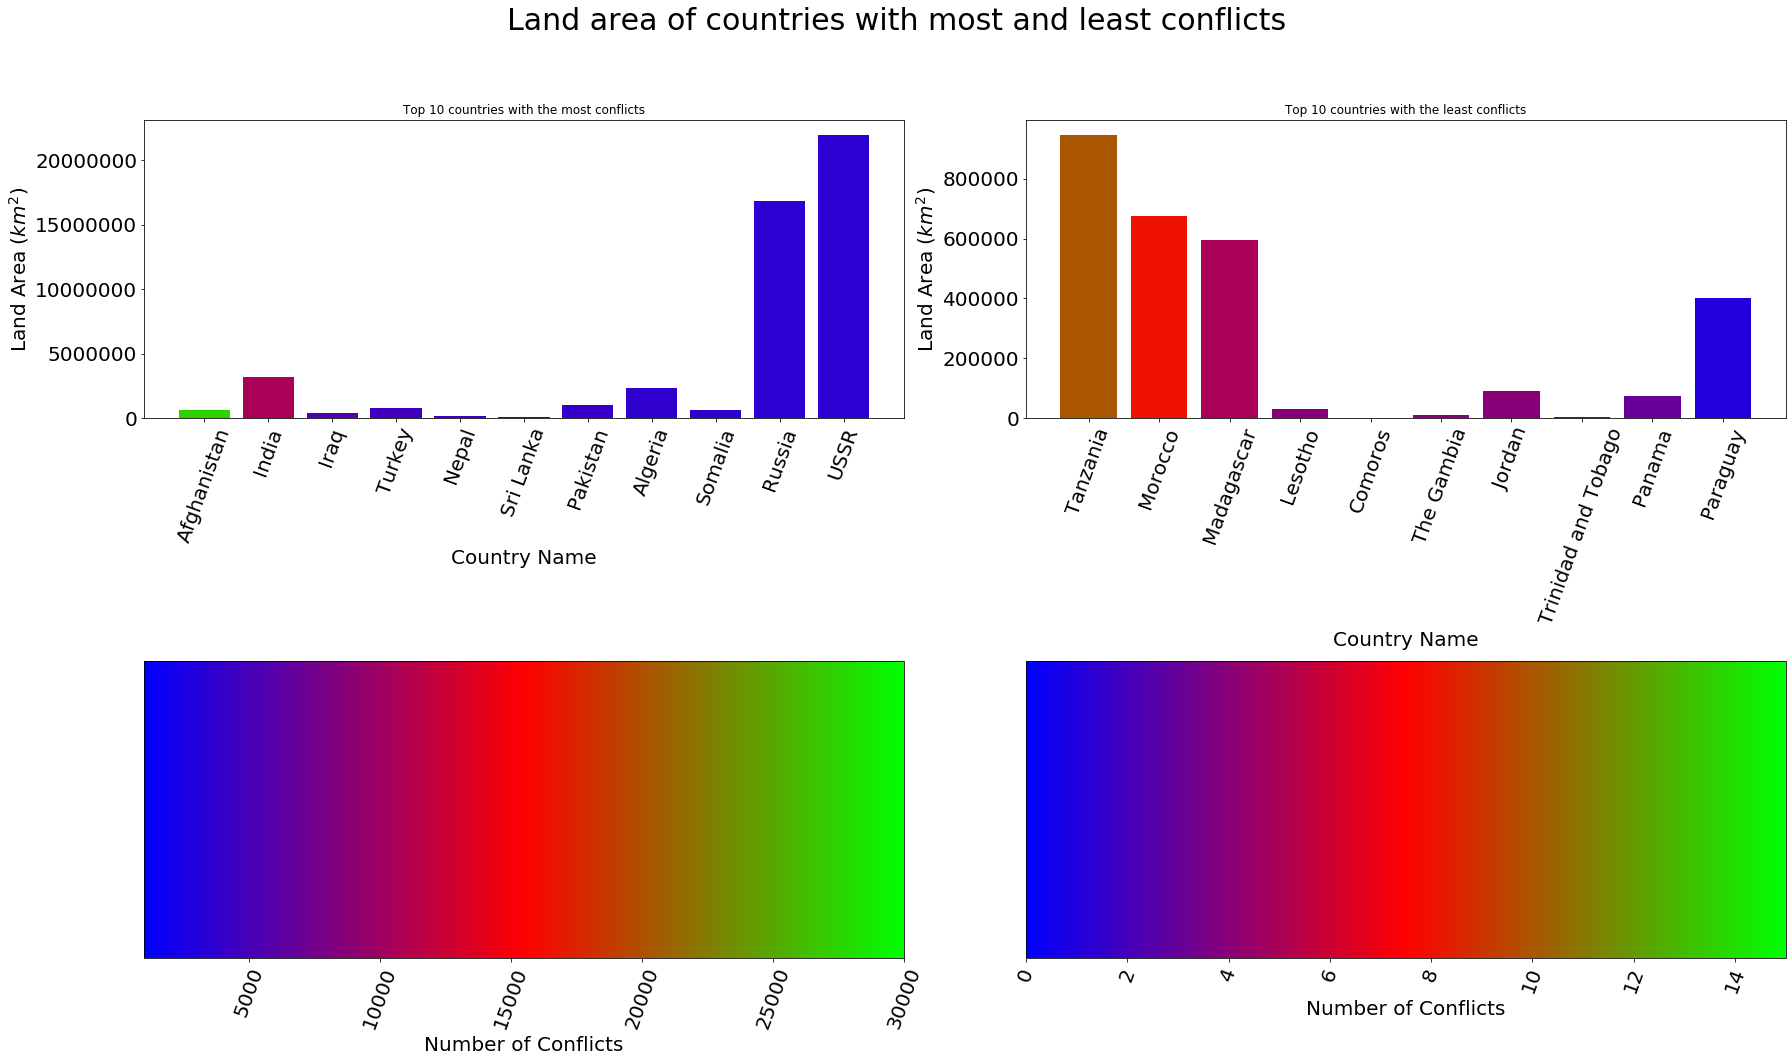

In [176]:
my_cmap = cm.get_cmap('brg')
my_norm = Normalize(vmin=1000, vmax=30000)
my_norm2 = Normalize(vmin=0, vmax=15)

f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(25,15))
ax1.bar(top10_full['CNTRY_NAME'],top10_full['AREA'], color=my_cmap(my_norm(top10_full['number_of_conflicts'].to_list())))
ax1.ticklabel_format(axis="y", style="plain")
ax1.set_title("Top 10 countries with the most conflicts")

ax2.bar(bottom10_full['CNTRY_NAME'],bottom10_full['AREA'], color=my_cmap(my_norm2(bottom10_full['number_of_conflicts'].to_list())))
ax2.set_title("Top 10 countries with the least conflicts")

for ax in (ax1,ax2):
    ax.set_xlabel('Country Name', fontsize=20)
    ax.set_ylabel('Land Area ($km^2$)', fontsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
for ax_cmap in (ax3,ax4):
    ax_cmap.xaxis.set_tick_params(labelsize=20)
    ax_cmap.yaxis.set_tick_params(labelsize=20)

for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=70)
plt.suptitle("Land area of countries with most and least conflicts", fontsize=30)

cb1 = matplotlib.colorbar.ColorbarBase(ax3, cmap=my_cmap, norm=my_norm, orientation='horizontal')
cb1.set_label('Number of Conflicts', fontsize=20)
cb2 = matplotlib.colorbar.ColorbarBase(ax4, cmap=my_cmap, norm=my_norm2, orientation='horizontal')
cb2.set_label('Number of Conflicts', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig(fname="fig.png")

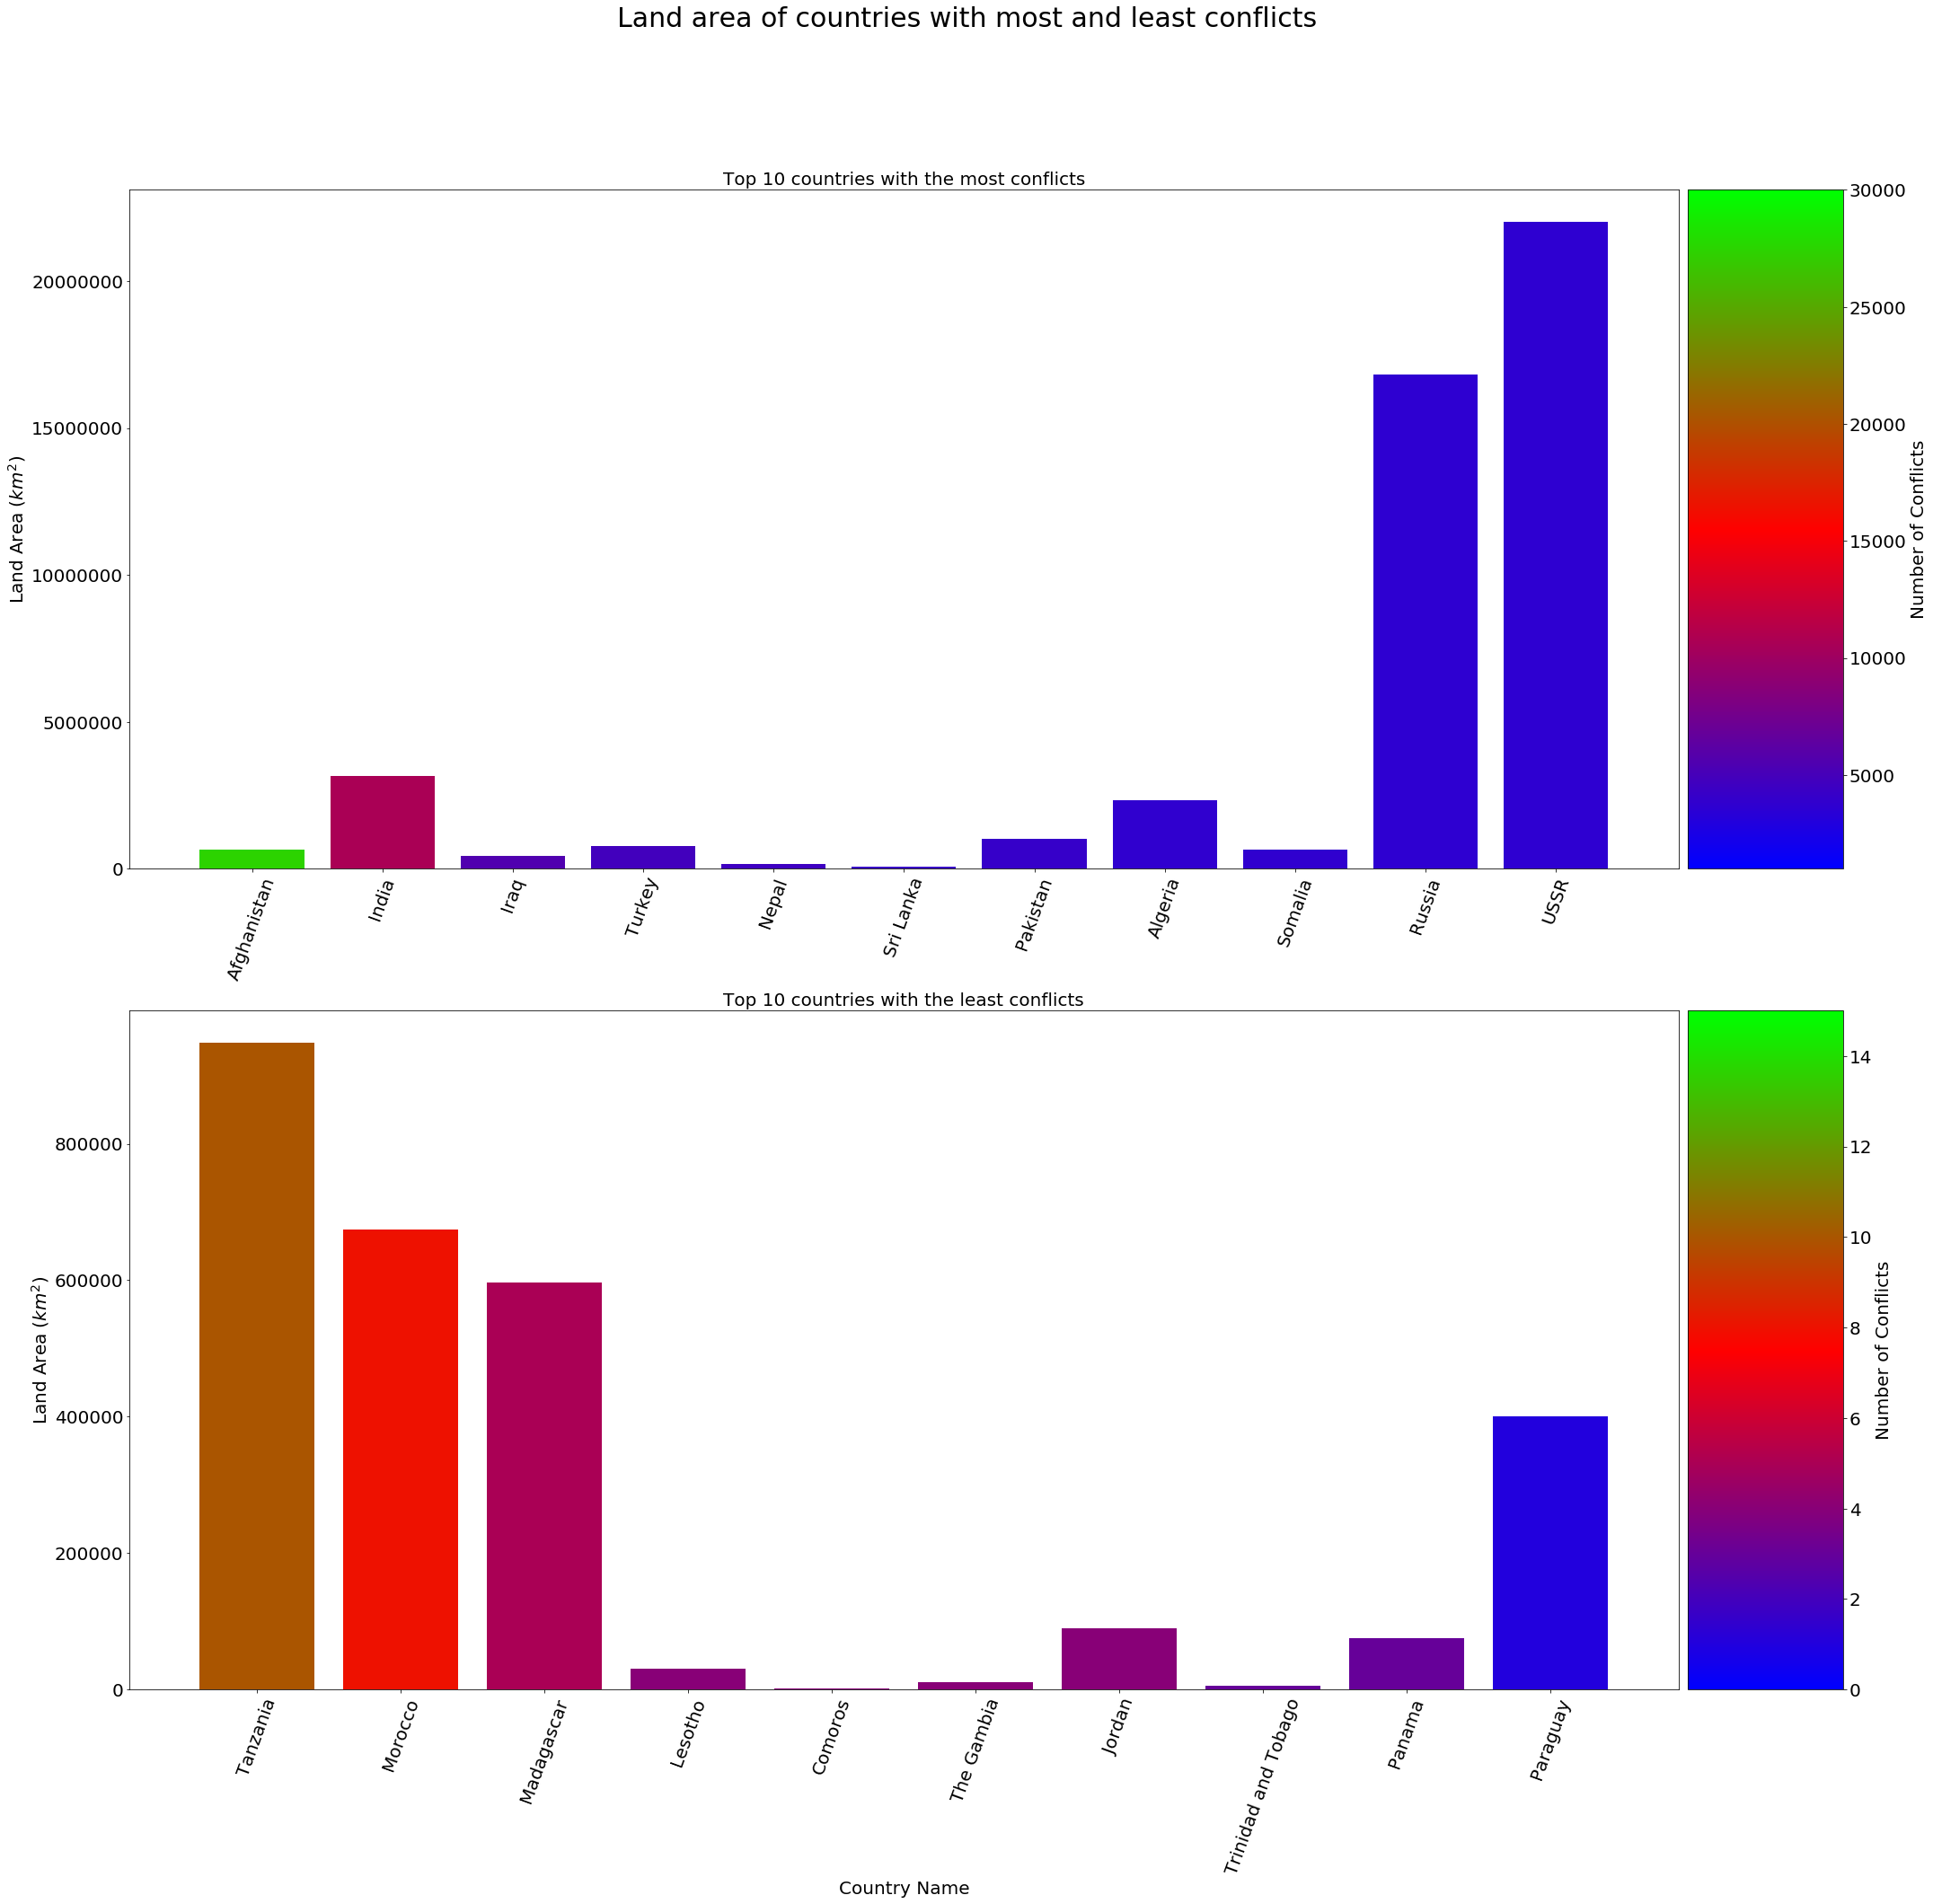

In [210]:
my_cmap = cm.get_cmap('brg')
my_norm = Normalize(vmin=1000, vmax=30000)
my_norm2 = Normalize(vmin=0, vmax=15)

fig2 = plt.figure(figsize=(30,30))
gs = gridspec.GridSpec(2, 2, width_ratios=[10, 1]) 
ax1 = plt.subplot(gs[0])
ax1.bar(top10_full['CNTRY_NAME'],top10_full['AREA'], color=my_cmap(my_norm(top10_full['number_of_conflicts'].to_list())))
ax1.ticklabel_format(axis="y", style="plain")
ax1.set_title("Top 10 countries with the most conflicts", fontsize=20)

ax2 = plt.subplot(gs[1])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=my_norm, orientation='vertical')
cb1.set_label('Number of Conflicts', fontsize=20)

ax3 = plt.subplot(gs[2])
ax3.bar(bottom10_full['CNTRY_NAME'],bottom10_full['AREA'], color=my_cmap(my_norm2(bottom10_full['number_of_conflicts'].to_list())))
ax3.set_title("Top 10 countries with the least conflicts", fontsize=20)

ax4 = plt.subplot(gs[3])
cb2 = matplotlib.colorbar.ColorbarBase(ax4, cmap=my_cmap, norm=my_norm2, orientation='vertical')
cb2.set_label('Number of Conflicts', fontsize=20)

ax3.set_xlabel('Country Name', fontsize=20)
for ax in (ax1,ax3):
    ax.set_ylabel('Land Area ($km^2$)', fontsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    
for ax_cmap in (ax2,ax4):
    ax_cmap.xaxis.set_tick_params(labelsize=20)
    ax_cmap.yaxis.set_tick_params(labelsize=20)

for ax in fig2.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=70)
    
plt.suptitle("Land area of countries with most and least conflicts", fontsize=30)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig(fname="fig.png")

In [10]:
cshapes_group = cshapes.groupby("GWCODE")[["AREA"]].count().sort_values(by=["AREA"])
cshapes_group
#for key,item in cshapes_group:
#    print(cshapes_group.get_group(key), "\n\n")

,AREA
GWCODE,
450,1
540,1
541,1
551,1
552,1
...,...
678,3
850,4
600,4


In [11]:
cshapes_group.drop([-1], inplace=True)

In [12]:
cshapes_group.reset_index(inplace=True)
print(cshapes_group)

     GWCODE  AREA
0       450     1
1       540     1
2       541     1
3       551     1
4       552     1
..      ...   ...
196     770     3
197     678     3
198     850     4
199     600     4
200     365    10

[201 rows x 2 columns]


In [13]:
agg_data = cshapes[cshapes["GWCODE"].isin(cshapes_group["GWCODE"].to_list())][["CNTRY_NAME","GWCODE","AREA","GWSYEAR","GWSMONTH","GWSDAY","GWEYEAR","GWEMONTH","GWEDAY"]]

In [14]:
agg_data["GWSDATE"] = agg_data["GWSYEAR"].astype(str) + '-' + agg_data["GWSMONTH"].astype(str) + '-' + agg_data["GWSDAY"].astype(str)

In [15]:
agg_data["GWEDATE"] = agg_data["GWEYEAR"].astype(str) + '-' + agg_data["GWEMONTH"].astype(str) + '-' + agg_data["GWEDAY"].astype(str)